
## Database Usage During Promote


In [165]:
import json
from collections import namedtuple
from collections import OrderedDict
#with open('data/promote_10_1000.json', 'r') as f:


def get_data(filename):
    with open(filename, 'r') as f:
        return json.loads(f.read())
    
# moments look like: [timestamp, charges_per_second, reads_per_second, inserts_per_second]
   
Sample = namedtuple("Sample", "cps, rps, ips")

Run = namedtuple("Run", "color algorithm samples")
data = [ 
        Run('#ff7402', "legacy monthly subscr", get_data('data/monthly_sub.json')),
        Run('#17ff02', "orig 10ms per 1000 merch", get_data('data/promote_10_1000.json')),
        Run('#022cff', "orig 50ms per 50 merch", get_data('data/promote_50_50.json')),
        Run('#ff0217', "orig 500ms per 10 merch", get_data('data/promote_500_10.json')),
       ]
        
processed_runs = []
sample_times = set()

for run in data:
    
    # how long was this run?
    sec = lambda x: x[0]
    t_low = min(map(sec, run[2]))
    t_high = max(map(sec, run[2]))
    
    # organize samples by time-in-run (not clock time)
    samples = OrderedDict()
    for idx, raw in enumerate(run.samples):
        moment = raw[0] - t_low;
        samples[moment] = Sample(raw[1], raw[2], raw[3])
        sample_times.add(moment)
        
    processed_runs.append(Run(run.color,
                              run.algorithm,
                              samples))

### Reads per second

legacy monthly subscr 
   median: 14.0 
      max: 200059 
 duration: 15:37:27 

orig 10ms per 1000 merch 
   median: 499.0 
      max: 30384 
 duration: 0:16:11 

orig 50ms per 50 merch 
   median: 456.0 
      max: 13705 
 duration: 0:18:4 

orig 500ms per 10 merch 
   median: 87.0 
      max: 29973 
 duration: 1:38:25 



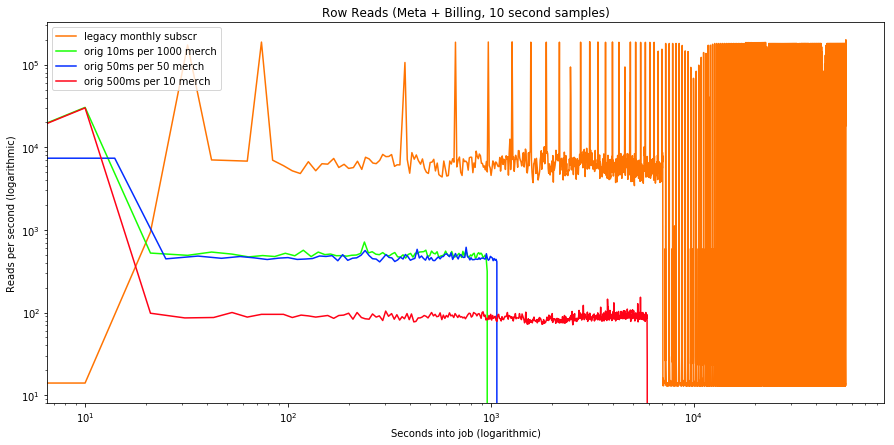

In [166]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.xscale('log')
plt.yscale('log')
plt.title('Row Reads (Meta + Billing, 10 second samples)')

for idx, run in enumerate(processed_runs):
    rps_ps = [v.rps for v in run.samples.values()]
    plt.plot(run.samples.keys(), rps_ps, color=run.color)
    
    median = np.median(rps_ps)
    
    m, s = divmod(max(run.samples.keys()), 60)
    h, m = divmod(m, 60)
    
    duration = max(run.samples.keys())
    print(run.algorithm,"\n   median:", median,
          "\n      max:", max(rps_ps),
          "\n duration: {}:{}:{}".format(h,m,s),
          "\n")
    
plt.legend([x.algorithm for x in processed_runs])    
plt.xlabel("Seconds into job (logarithmic)")
plt.ylabel("Reads per second (logarithmic)")
plt.show()



##### %matplotlib inline

plt.figure(figsize=(15,7))
#plt.xscale('log')
#plt.yscale('log')
plt.title('Row Inserts (Meta + Billing, 10 second samples)')

for idx, run in enumerate(processed_runs):
    ips_ps = [v.ips for v in run.samples.values()]
    plt.plot(run.samples.keys(), ips_ps, color=run.color)
    
    median = np.median(ips_ps)
    
    m, s = divmod(max(run.samples.keys()), 60)
    h, m = divmod(m, 60)
    
    duration = max(run.samples.keys())
    print(run.algorithm,"\n   median:", median,
          "\n      max:", max(ips_ps),
          "\n duration: {}:{}:{}".format(h,m,s),
          "\n")
    
plt.legend([x.algorithm for x in processed_runs])    
plt.xlabel("Seconds into job (logarithmic)")
plt.ylabel("Inserts per second (logarithmic))")
plt.show()

legacy monthly subscr 
   median: 0.0 
      max: 26 
 duration: 15:37:27 

orig 10ms per 1000 merch 
   median: 149.0 
      max: 319 
 duration: 0:16:11 

orig 50ms per 50 merch 
   median: 132.0 
      max: 206 
 duration: 0:18:4 

orig 500ms per 10 merch 
   median: 23.0 
      max: 31 
 duration: 1:38:25 



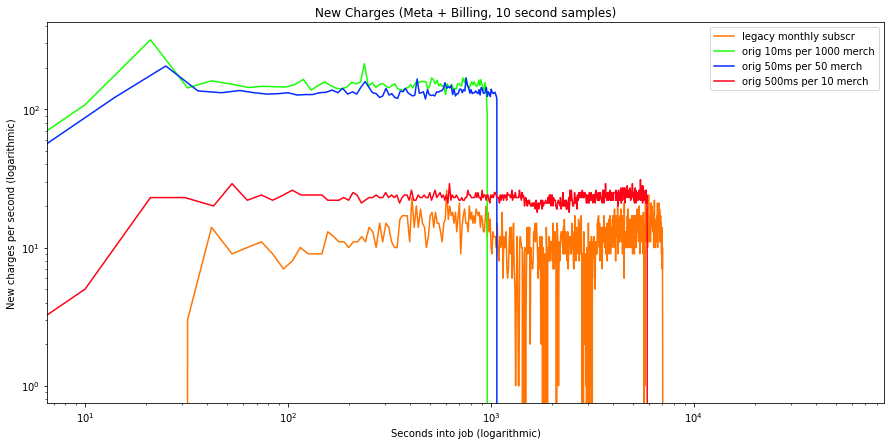

In [168]:
%matplotlib inline

plt.figure(figsize=(15,7))
plt.xscale('log')
plt.yscale('log')
plt.title('New Charges (Meta + Billing, 10 second samples)')

for idx, run in enumerate(processed_runs):
    cps_ps = [v.cps for v in run.samples.values()]
    plt.plot(run.samples.keys(), cps_ps, color=run.color)
    
    median = np.median(cps_ps)
    
    m, s = divmod(max(run.samples.keys()), 60)
    h, m = divmod(m, 60)
    
    duration = max(run.samples.keys())
    print(run.algorithm,"\n   median:", median,
          "\n      max:", max(cps_ps),
          "\n duration: {}:{}:{}".format(h,m,s),
          "\n")
    
plt.legend([x.algorithm for x in processed_runs])    
plt.xlabel("Seconds into job (logarithmic)")
plt.ylabel("New charges per second (logarithmic)")
plt.show()